In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df= pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Limpieza de datos

Antes de comenzar el modelo es importante checar la estructura del dataset, asegurándonos que no haya datos nulos.

In [44]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [54]:
X = df['YearsExperience'].values
y = df['Salary'].values




# Cálculo de coeficientes

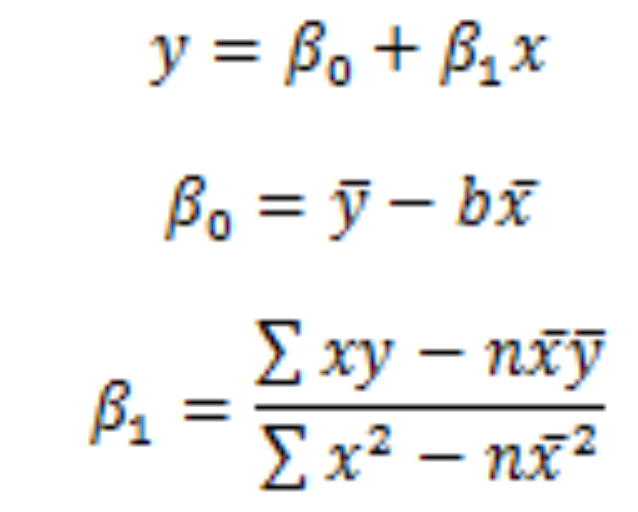

In [55]:
X = df['YearsExperience'].values
y = df['Salary'].values



xy = X * y
x_squared = X ** 2
y_squared = y ** 2


df_visualization = pd.DataFrame({
    'X values (Years)': X,
    'y values (Salary)': y,
    'xy': xy,
    'x²': x_squared,
    'y²': y_squared
})

df_visualization.head()

,X values (Years),y values (Salary),xy,x²,y²
0,1.1,39343.0,43277.3,1.21,1.547872e+09
1,1.3,46205.0,60066.5,1.69,2.134902e+09
2,1.5,37731.0,56596.5,2.25,1.423628e+09
3,2.0,43525.0,87050.0,4.00,1.894426e+09
4,2.2,39891.0,87760.2,4.84,1.591292e+09


In [46]:
#n= tamaño de todos los  datos
n = len(X)

#Sumatoria de las columnas adicionales
sum_X = np.sum(X)
sum_y = np.sum(y)
sum_Xy = np.sum(X * y)
sum_X_squared = np.sum(X ** 2)

#Çálculo de b1 y b0
b1 = (n * sum_Xy - sum_X * sum_y) / (n * sum_X_squared - sum_X ** 2)
b0 = np.mean(y) - b1 * np.mean(X)

print(f"Pendiente (b1): {b1}")
print(f"Intercepto (b0): {b0}")

Pendiente (b1): 9449.962321455077
Intercepto (b0): 25792.20019866869


#Predicciones

In [47]:
y_pred = b0 + b1 * X
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [41]:
#Predicción de y
print('Y= ', b0, '+' , b1,'x')

Y=  25792.20019866869 + 9449.962321455077 x


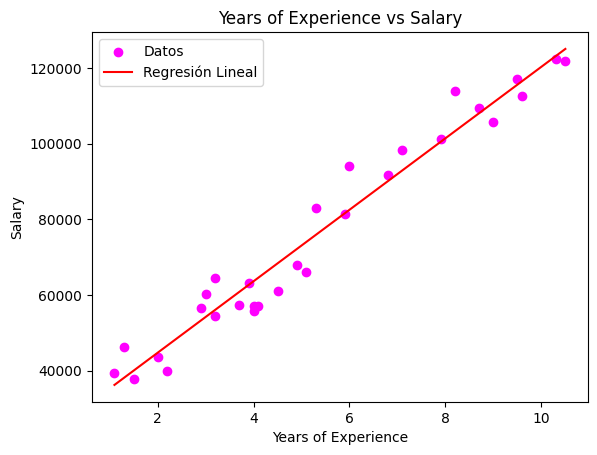

In [42]:
plt.scatter(X, y, color='magenta', label='Datos')
plt.plot(X, y_pred, color='red', label='Regresión Lineal')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()

Al observar la distribución de los datos con la línea de regresión, se puede visualizar que el ajuste que hay entre la línea de regresión a los puntos es bastante buena, por lo quee, demuestra que sí existe cierta relación entre los años de experiencia y el salario. Esto se puede comprobar en la matriz de correlación.

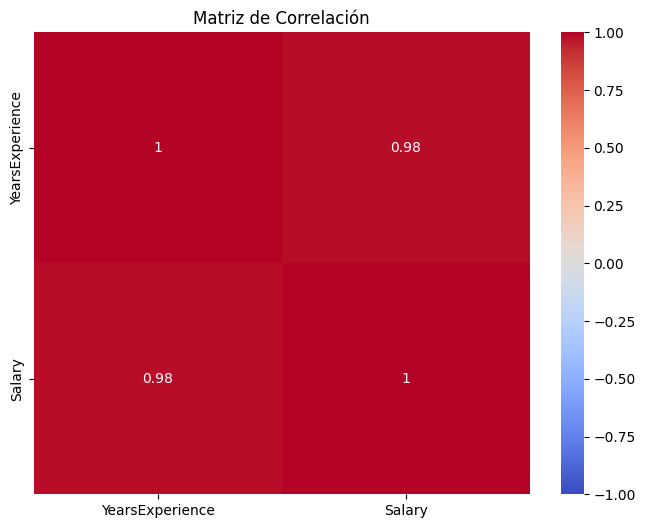

In [60]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()



# Comprobación del accuracy

Para comprobar el rendimiento del modelo se calculará el coeficiente de determinación.

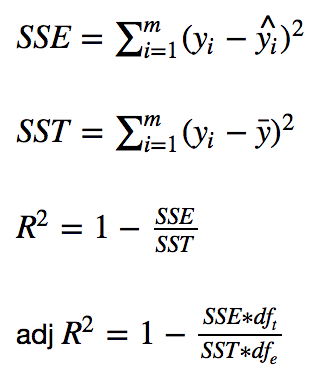

In [64]:
#Media de y
y_mean = np.mean(y)

# Calcular SST
SST = np.sum((y - y_mean) ** 2)

# Calcular SSE
SSE = np.sum((y - y_pred) ** 2)

# Calcular R^2
R2 = 1 - (SSE / SST)

print(f"Coeficiente de Determinación R^2: {R2:.4f}")


Coeficiente de Determinación R^2: 0.9570


Esto indica que el 95% de la variabilidad en los salarios puede ser explicada por el número de años de experiencia, puesto que el ajuste de los datos es altamente preciso para sus predicciones.

# Comparación Modelo Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression


X = df['YearsExperience'].values
y = df['Salary'].values

X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

model = LinearRegression()
model.fit(X, y)

b1 = model.coef_[0]
b0 = model.intercept_

# Mostrar los resultados
print(f"Pendiente (b1): {b1}")
print(f"Intercepto (b0): {b0}")

Pendiente (b1): 9449.962321455076
Intercepto (b0): 25792.200198668696


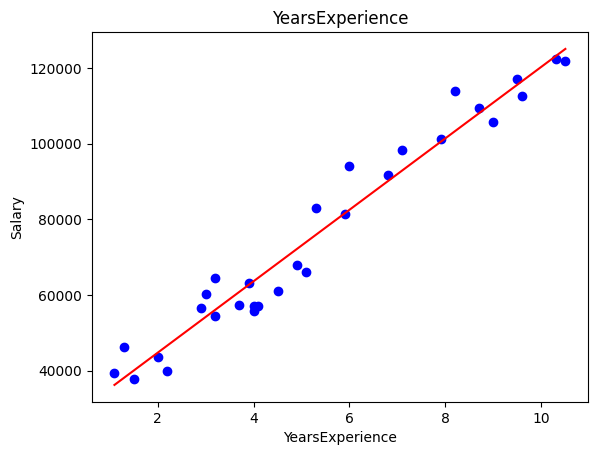

In [51]:
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience')
plt.show()

In [53]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(f'Coeficiente de Determinación R^2: {r2}')

Coeficiente de Determinación R^2: 0.9569566641435086
